In [157]:
import sys
import os
import cv2
import numpy as np
from IPython.display import Image as img_display

In [158]:
print('\ndetect_er_chars.py')
print('       A simple demo script using the Extremal Region Filter algorithm described in:')
print('       Neumann L., Matas J.: Real-Time Scene Text Localization and Recognition, CVPR 2012\n')


detect_er_chars.py
       A simple demo script using the Extremal Region Filter algorithm described in:
       Neumann L., Matas J.: Real-Time Scene Text Localization and Recognition, CVPR 2012



In [159]:
# if (len(sys.argv) < 2):
#   print(' (ERROR) You must call this script with an argument (path_to_image_to_be_processed)\n')
#   quit()
file='scenetext_char011.png'

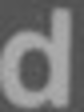

In [160]:
pathname='/notebooks/resources' #os.path.dirname(sys.argv[0])
file=pathname+'/'+file
img = cv2.imread(file)#(str(sys.argv[1]))
gray= cv2.imread(file,0)#(str(sys.argv[1]),0)
img_display(filename=file)

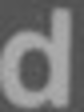

In [161]:
#Apply dilation and erosion to remove some noise
kernel =np.ones((1,1),np.uint8)
gray=cv2.dilate(gray,kernel,iterations=1)
gray=cv2.erode(gray,kernel,iterations=1)

#Write image after removed noise
cv2.imwrite(pathname+"/removed_noise.png",gray)
# display in IPython
img_display(filename=pathname+"/removed_noise.png")

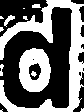

In [162]:
# Apply threshold to get image with only black and white
gray=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,31,2)

# invert color
gray=cv2.bitwise_not(gray)

# Write the image after apply opencv to do some...
cv2.imwrite(pathname+"/thres.png",gray)
# display in IPython
img_display(filename=pathname+"/thres.png")

In [163]:
erc1=cv2.text.loadClassifierNM1(pathname+'/trained_classifierNM1.xml')
er1=cv2.text.createERFilterNM1(erc1)

erc2=cv2.text.loadClassifierNM2(pathname+'/trained_classifierNM2.xml')
er2=cv2.text.createERFilterNM2(erc2)

regions=cv2.text.detectRegions(gray,er1,er2)

In [164]:
regions

[array([[37, 63],
        [36, 64],
        [35, 64],
        [34, 64],
        [33, 65],
        [32, 65],
        [31, 65],
        [30, 66],
        [29, 67],
        [29, 68],
        [29, 69],
        [29, 70],
        [29, 71],
        [29, 72],
        [29, 73],
        [30, 74],
        [30, 75],
        [30, 76],
        [31, 77],
        [31, 78],
        [32, 79],
        [33, 79],
        [34, 79],
        [35, 79],
        [36, 79],
        [37, 78],
        [38, 77],
        [38, 76],
        [38, 75],
        [39, 74],
        [39, 73],
        [40, 72],
        [40, 71],
        [40, 70],
        [40, 69],
        [40, 68],
        [39, 67],
        [39, 66],
        [38, 65],
        [38, 64]], dtype=int32), array([[82,  6],
        [81,  7],
        [80,  7],
        [80,  8],
        [79,  9],
        [79, 10],
        [80, 11],
        [80, 12],
        [81, 13],
        [81, 14],
        [81, 15],
        [81, 16],
        [81, 17],
        [81, 18],
        [81, 1

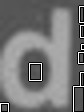

In [165]:
# Visaulization
# rects=[cv2.boundingRect(p) for p in regions] #[cv2.boundingRect(p.reshape(-1,1,2)) for p in regions]
rects=[cv2.boundingRect(p.reshape(-1,1,2)) for p in regions]
for rect in rects:
    cv2.rectangle(img,rect[0:2],(rect[0]+rect[2],rect[1]+rect[3]),(0,0,0),2)
for rect in rects:
    cv2.rectangle(img,rect[0:2],(rect[0]+rect[2],rect[1]+rect[3]),(255,255,255),1)
#cv2.imshow("Text detection result",img)
# cv2.waitKey(0)
cv2.imwrite(pathname+"/result.png",img)
img_display(filename=pathname+"/result.png")